# Statistics

Data analysis commonly involves calculating descriptive statistics, fitting data to a model, quantifying uncertainty, and evaluating significance. You will take a full course in statistcs, if you haven't already, where you will learn a lot about these methods. This course section illustrates how to perform some common statistical calculations in Python.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Statistical graphics and Seaborn

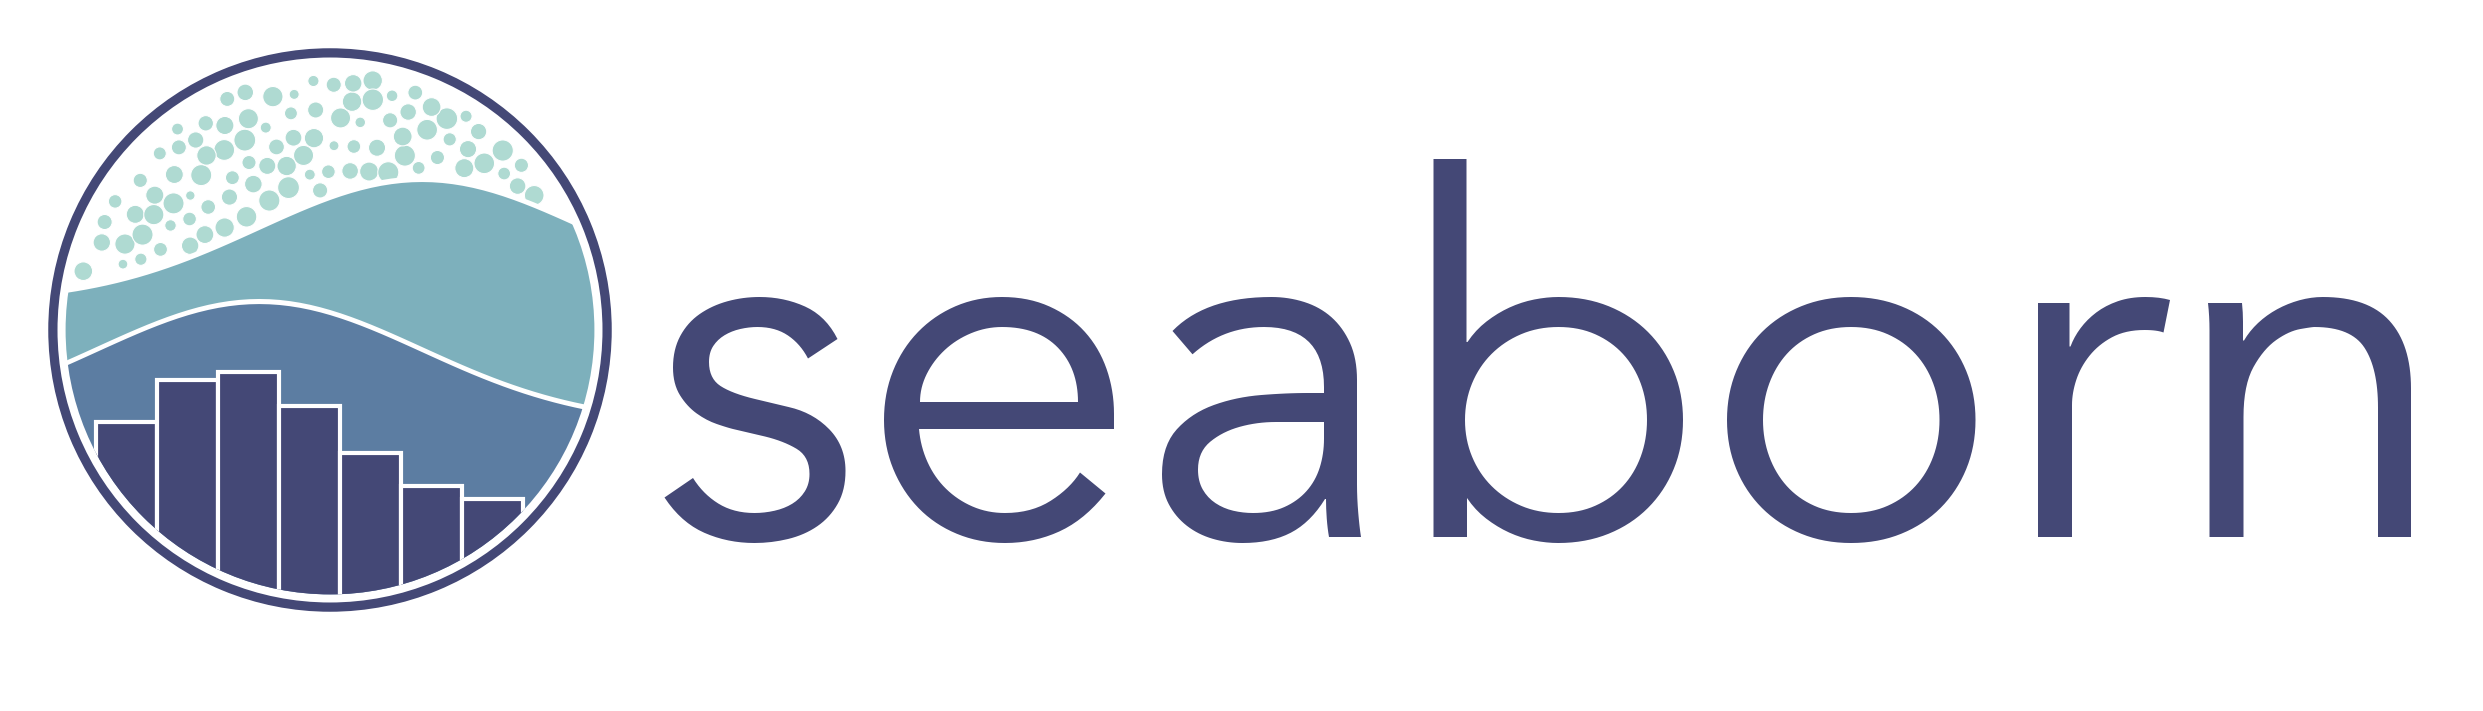

[Seaborn](https://seaborn.pydata.org/index.html) is a Python data visualization library based on matplotlib, specializing in *statistical* graphics.

Some examples below will use seaborn.

You are *not* expected to learn or use seaborn in this course, but be aware that it expands the plotting capabilities of matplotlib.

See the [seaborn gallery](https://seaborn.pydata.org/examples/index.html) for examples of the visualizations it can make.

In [ ]:
# Import seaborn
import seaborn as sns

## Basic statistical concepts


### Accuracy and Precision

***Accuracy*** is how close data are to the actual, true value. 

Experimental ***Precision*** is the reproducibility of the data. (Mathematical precision is the number of significant digits.)

**Estimates of $\pi$**
|value|Accuracy or Precision|
|-|-|
|3.1415926535   | accurate and precise|
|3.1            | accurate, not precise |
| 4.2263172381  | precise, not accurate|
| 4             | not accurate, not precise  |

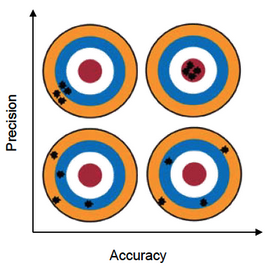

### Population and Sample

The ***Population*** is the collection of all possible individuals, objects, or  events for a given measurement. We almost never have measurements of a complete population.

***Samples*** are finite groups within the population that are measured or observed.

Examples: 
* A *sample* of 1000 women is used to study the efficacy of a new drug for the *population* of all women.
* Soil carbon storage is measured at 30 sites (*sample*) and used to estimate carbon storage for a forest (*population*).
* Historical hurricane tracks are a *sample* of the tracks that the *population* of hurricanes could take.

### Outliers and Robustness

***Outliers*** are extreme values that appear inconsistent with vast majority of a sample. Outliers *may* be caused by data collection errors or sampling from muliple populations.

$$S=\{11,12,13,14,15,16,17,18,91\}$$

***Robust*** statistics are insensitive to outliers. 

Measures of central value:
* mean($S$) = 23 $\Rightarrow$ Highly sensitive to the outlier (91), so mean is *fragile*
* median($S$) = 15 $\Rightarrow$ median is *robust*.

### Probability

***Probability*** ($P$) is the measure of likelihood for an event or observation to occur. $P=0$ for impossible outcomes. $P=1$ for completely certain outcomes.


In [ ]:
# Load Titanic passenger dataset
titanic = pd.read_csv('datasets/titanic.csv')

## Always visualize and check consistency with expectations

Inspecting data is a *critical* step for quality assurance. Look for...
* impossible outliers - requires data cleaning
* values consistent with expectation
* mixed up variable names or units

In [ ]:
fig, (ax0,ax1) = plt.subplots(nrows=2)

# Histogram of passenger ages
titanic.plot.hist(y='Age', bins=30, ax=ax0)

# Histogram of passenger fares
titanic.plot.hist(y='Fare', bins=30, ax=ax1)
# There are some fare outliers, but these have been checked and are valid

## Descriptive statistics

### Quantiles 

Quantiles are precentiles expressed in the range $[0,1]$.

Quantile $q \in [0,1]$ is a value that exceeds a fraction $q$ of the values. Minimum is $q=0$; maximum is $q=1$; median is $q=0.5$.

In [ ]:
# Compute some quantiles for the Fare column
titanic['Fare'].quantile([0, 0.25, 0.5, 0.75, 0.95, 0.99, 1])

### Measures of central tendency or location

***Mean*** - sensitive to outliers
$$\bar{x}=\frac{1}{N}\sum^N_{i=1}x_i$$

***Median*** - value that evenly splits the number of observations in half. *Robust* to outliers

In [ ]:
# Functions for mean and median
print(
    titanic['Fare'].mean(), 
    titanic['Fare'].median(), sep='\n' )

### Measures of spread

***Sample standard deviation*** 
$$s=\sqrt{\frac{1}{N-1}\sum_{i=1}^N (x_i-\bar{x})^2}$$
* small $s$ $\Rightarrow$ most values are close to the mean
* large $s$ $\Rightarrow$ values are spread over a large range
* sensitive to outliers
* estimates the standard deviation of the population from values in a sample (hence denominator $(N-1)$)

***Variance*** $V=s^2$

***Range*** = maximum - minimum

***Interquartile range*** (IQR) = $q_{0.75}-q_{0.25}$ - range encompassing the middle 50% of the values.

***Median absolute deviation*** (MAD) = median $|x_i-q_{0.5}|$ 
* analogous to standard deviation using operations less sensitive to extremes

In [ ]:
# Standard deviation
print( 'std', titanic['Fare'].std() )
# Range
print( 'range', titanic['Age'].max() - titanic['Age'].min() )
# Interquartile range
print( 'IQR', titanic['Age'].quantile(0.75) - titanic['Age'].quantile(0.25) )
# Median absolute deviation
print( 'MAD', ( titanic['Age'] - titanic['Age'].median() ).abs().median() )

In [ ]:
# Age histogram with mean, median, and quartiles
ax = plt.subplot()
titanic.plot.hist(y='Age', bins=30, ax=ax)
ax.axvline(titanic['Age'].mean(), color='C1',label='mean')
ax.axvline(titanic['Age'].median(), color='C2',label='median')
ax.axvline(titanic['Age'].quantile(0.25), color='C3',label=r'$q_{0.25}$')
ax.axvline(titanic['Age'].quantile(0.75), color='C4',label=r'$q_{0.75}$')
ax.legend()

In [ ]:
# pandas describe() method provides many descriptive statistics
titanic[['Age','Fare']].describe()

### Measures of asymmetry or skew

***Skewness*** measures asymmetry of the distribution tails
$$g_3 = \frac{\frac{1}{N-1} \sum_{i=1}^N (x_i-\bar{x})^3}{s^3}$$
* $g_3 < 0$ $\Rightarrow$ left tail is longer; distribution has few high values
* $g_3 > 0$ $\Rightarrow$ right tail is longer; distribution has few low values
* $g_3 = 0$ $\Rightarrow$ distribution is symmetric
* very sensitive to outliers

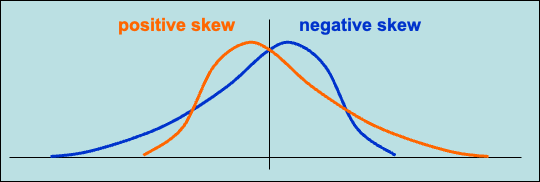

In [ ]:
# Before running this cell...
# Predict whether Age skew is positive or negative
print('Skewness', titanic['Age'].skew() )

In [ ]:
# Before running this cell...
# Predict whether Fare skew is positive or negative, larger or smaller than Age
print('Skewness', titanic[['Age','Fare']].skew() )

## Graphical summary figures

***Boxplots***

Simple boxplot
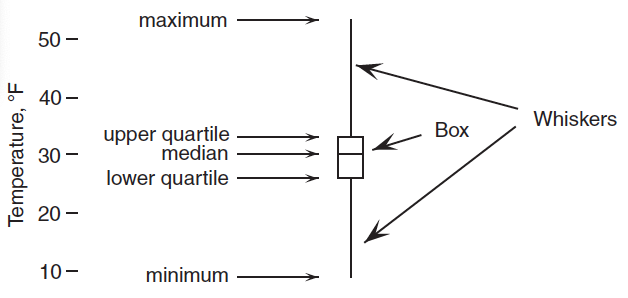

Whiskers are often limited to 1.5*IQR
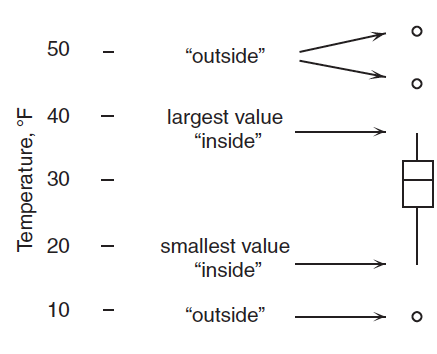


In [ ]:
# Pandas boxplot
titanic.boxplot(column='Age',by='Pclass')

In [ ]:
# Seaborn boxplots allow multiple groupings
sns.boxplot( data=titanic, x='Pclass', y='Age', hue='Sex')

### Boxplot variations

***Violinplot*** width proportional to histogram, with smoothing

***Swarmplot*** plot every data point, arranged like a histogram

In [ ]:
# seaborn violin plot
sns.violinplot(data=titanic, x='Pclass',y='Age', hue='Sex')

In [ ]:
# seaborn swarmplot
sns.swarmplot(data=titanic, x='Pclass',y='Age', hue='Sex', size=3)

## Paired data

With paired measurements of two or more quantities, we can examine relationships between variables. 

Visually, use ***scatterplots***.

In [ ]:
titanic.plot.scatter('Age','Fare')

### Pearson or Ordinary correlation

***Pearson correlation***, often simply ***correlation coefficient***, describes the strength of a *linear* relationship between two variables.
$$r_{xy} = \frac{1}{N-1}\sum_{i=1}^N \frac{(x_i-\bar{x})(y_i-\bar{y})}{s_x s_y}$$

* $-1\leq r_{xy}\leq +1$
* $r_{xy} = +1$ $\Rightarrow$ perfect correlation
* $r_{xy} = -1$ $\Rightarrow$ perfect anti-correlation
* $r_{xy} = 0$ $\Rightarrow$ no linear relationship


In [ ]:
# Pearson correlation among columns of a DataFrame
# Select columns of interest before computing correlation
titanic[['Age','Fare']].corr()

The ***coefficient of determination*** ***$r^2$*** $=r_{xy}^2$ is the fraction of variance in $x$ that can be predicted from $y$ (with a linear relationship). 

For the Titanic data, the coefficient of determination  is $r^2= 0.096^2 = 0.009$, so 0.9% (essentially none) of the variance in fare can be predicted from a passenger's age.

***Reminder*** always visualize data!

Anscombe's quartet showing 4 datasets with the same Pearson correlation coefficient ($r_{xy}=0.82$) and same regression line ($y=3+x/2$), but very different underlying relationships.
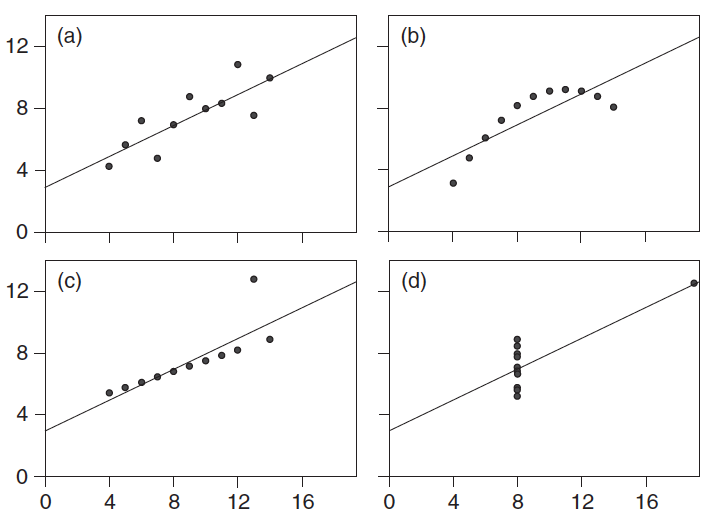

a. Relationship appears linear

b. Relationship is *not* linear

c. An outlier deviates from a strong linear relationship

d. A single outlier is responsible for all of the apparent correlation


***Spearman rank correlation*** measures whether two variables increase together, regardless of magnitude. 
* Useful for non-linear relationships
* Resistant to outliers
* Cannot be interpreted as explained variance

In [ ]:
# Define data with a non-linear relationship
df = pd.DataFrame( {'x':np.arange(6)} )
df['y'] = np.exp( df['x'] )
df.plot.scatter('x','y')

In [ ]:
# Pearson correlation
print('Pearson')
print(df.corr())

# Spearman rank correlation coefficient
print('Spearman')
print(df.corr(method='spearman'))

## Curve Fitting

Constructing a mathematical function that fits some data.

***Interpolation*** exactly fits the input data, "joining the dots". See xarray.ipynb, pandas.ipyny, and scipy.interpolate.

***Regression*** approximately fits the input data, assuming they have some error.

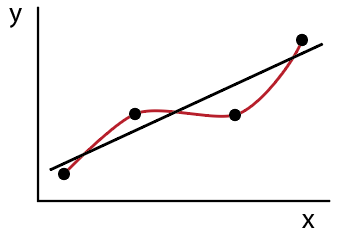

### Regression 

Regression is optimization problem to minimize the difference between observed and predicted values (supervised machine learning). 
$$y = m x + b$$ 

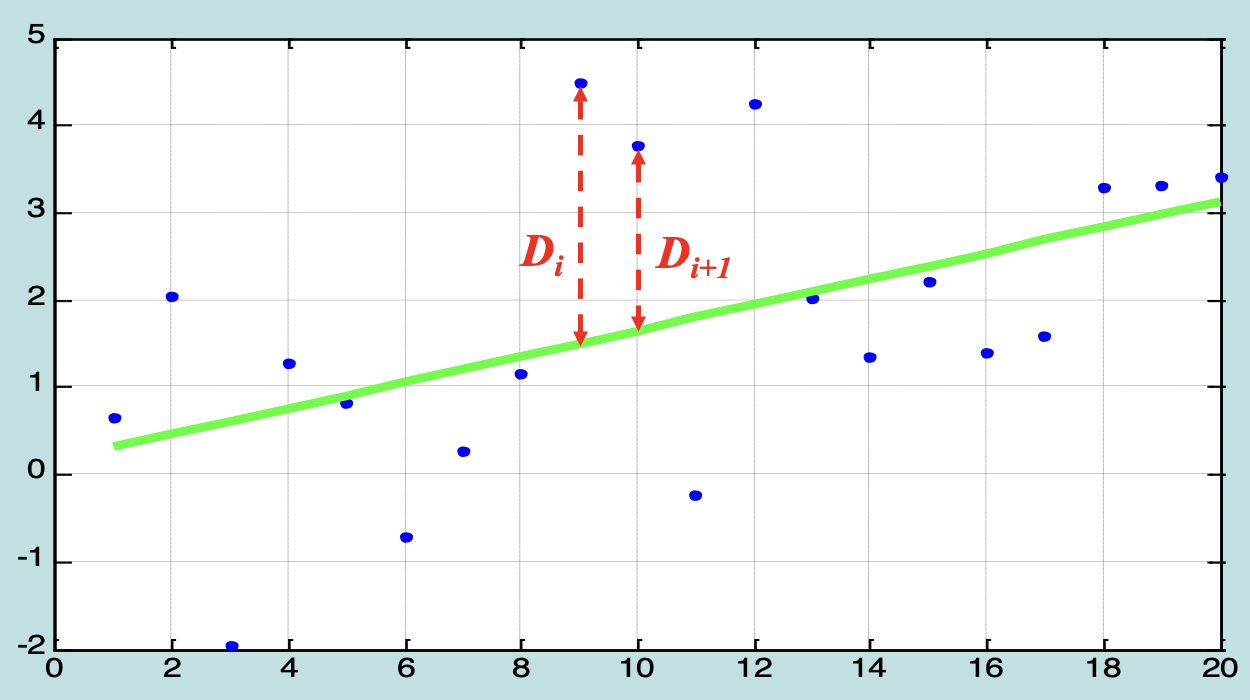

What should we minimize? 
* $\sum_{i=1}^N |D_i|$ 
* $\sum_{i=1}^N D_i^2$ $\Rightarrow$ ***least squares***
* many more

[scipy.stats.linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) performs least-squares regression.

In [ ]:
# linregress is in scipy.stats
from scipy import stats

# Generate some data
rng = np.random.default_rng()
x = rng.random(10)
y = 1.6*x + rng.random(10)

# Linear least-squares regression
result = stats.linregress(x,y)

# plot the data and fit
plt.plot(x, y, 'o', label='original data')
plt.plot(x, result.intercept + result.slope*x, 'r', label='fitted line')
plt.legend()

In [ ]:
# Information about the fit
print(f"R-squared:   {result.rvalue**2:.6f}")
print(f"slope:     m={result.rvalue**2:.6f}")
print(f"intercept: b={result.rvalue**2:.6f}")
